In [37]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import math

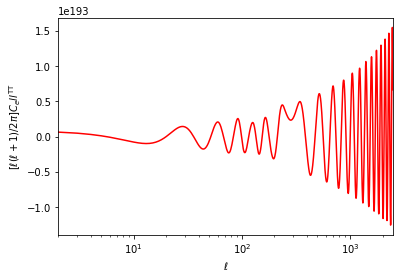

In [42]:
LCDM = Class()
LCDM.set({'output':'tCl ,pCl ,lCl ,mP','modes':'s,t', 'lensing':'yes'})
LCDM.set({'P_k_ini type':'inflation_V', 'potential': 'natural'})
#  /* V(phi) = Lambda^4(1+cos(phi/f)) = V0 (1+cos(phi/V1)) */ line 950 primordial.c
#/**                                                                                                                                                                          
# * This routine encodes the inflaton scalar potential                                                                                                                                                                                                                                                                                                   
# * @param ppm            Input: pointer to primordial structure                                                                                                              
# * @param phi            Input: background inflaton field value in units of Mp                                                                                               
# * @param V              Output: inflaton potential in units of \f$ Mp^4\f$                                                                                                  
# * @param dV             Output: first derivative of inflaton potential wrt the field                                                                                        
# * @param ddV            Output: second derivative of inflaton potential wrt the field                                                                                       
# * @return the error status                                                                                                                                                  
# */
#Line 500 explanatory.ini
#V_0=1.e-13
#V_1=-1.e-14
#LCDM.set({'V_0':1e15, 'V_1': -1e5})
#https://arxiv.org/pdf/hep-ph/0404012.pdf Eq 2
#Lambda^4=V0
#Lambda~10^15
#mPl= 1.22×10^19
LCDM.set({'V_0':1e60, 'V_1': -1e-5})
LCDM.compute()
cls = LCDM.lensed_cl (2500)
ll = cls['ell'][2:]
pi=3.1416
clTT = cls['tt'][2:]
plt.figure (1)
plt.xscale('log')
plt.yscale('linear')
plt.xlim (2 ,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1) /2\pi]   C_ell^\ mathrm{TT}$')
plt.plot(ll ,clTT*ll*(ll+1) /2.*pi,'r-')


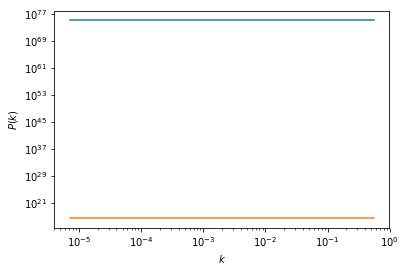

In [40]:
pm = LCDM.get_primordial()
pm.viewkeys()
plt.loglog(pm['k [1/Mpc]'],pm['P_scalar(k)'])
if pm.has_key('P_tensor(k)'):
    plt.loglog(pm['k [1/Mpc]'],pm['P_tensor(k)'])
plt.xlabel(r"$k$")
plt.ylabel(r"$P(k)$")